<a href="https://colab.research.google.com/github/drpetros11111/opencv_notes/blob/4.x/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition

In [ ]:
import cv2

We load the cascade for the face and eyes.

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

We create a function that takes as input the image in black and white (gray) and the original image (frame), and that will return the same image with the detector rectangles.

We apply the detectMultiScale method from the face cascade to locate one or several faces in the image.

For each detected face:

* We paint a rectangle around the face.
* We get the region of interest in the black and white image.
* We get the region of interest in the colored image.
* We apply the detectMultiScale method to locate one or several eyes in the image.

For each detected eye:

* We paint a rectangle around the eyes, but inside the referential of the face.

We return the image with the detector rectangles.

In [ ]:
def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh), (0, 255, 0), 2)
    return frame

# Detect Faces Function
This function, named detect, is designed to detect faces and eyes within an image and draw rectangles around them. Here's a step-by-step explanation:


---

---



##Function Definition and Input:

    def detect(gray, frame):

The function is named detect and takes two arguments:

##gray:
This represents the input image in grayscale format.

Grayscale is often used in computer vision tasks as it simplifies the image data while preserving essential features.


##frame:
This represents the original color image.

-----------------------------
##Face Detection:

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

face_cascade is a pre-trained classifier object from OpenCV (likely loaded earlier in your code).

It is used to detect faces in the gray image.

detectMultiScale is a method that applies the face cascade classifier to find faces at different scales and locations within the image.

The parameters 1.3 and 5 control the scaling factor and minimum neighbors, respectively, influencing the detection process.

The detected faces are stored in the faces variable, which is likely a list of rectangles, each represented by (x, y, width, height).

--------------------------
##Processing Each Detected Face:

    for (x, y, w, h) in faces:
        # ... (code to process each face)

This loop iterates through each detected face rectangle. x, y, w, and h represent the top-left corner coordinates, width, and height of the rectangle, respectively.

----------------------------
##Drawing Rectangle Around Face:

    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2.rectangle is an OpenCV function that draws a rectangle on the frame (color image).

(x, y) and (x+w, y+h) specify the top-left and bottom-right corners of the rectangle.

(255, 0, 0) is the color of the rectangle (blue in BGR color space).
2 is the thickness of the rectangle lines.

-------------------------
##Region of Interest (ROI) Extraction:

    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]

These lines extract the regions of interest (ROIs) corresponding to the detected face from both the grayscale (roi_gray) and color (roi_color) images.

This focuses further processing on the face area.

----------------------------------
##Eye Detection:

    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)

Similar to face detection, this line uses an eye cascade classifier (eye_cascade) to detect eyes within the grayscale ROI (roi_gray).

The parameters 1.1 and 3 control the scaling and minimum neighbors for eye detection.

Processing Each Detected Eye:

    for (ex, ey, ew, eh) in eyes:
         # ... (code to process each eye)

This loop iterates through each detected eye rectangle. ex, ey, ew, and eh represent the coordinates, width, and height of the eye rectangle.

-----------------------
##Drawing Rectangle Around Eye:

    cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh), (0, 255, 0), 2)

Similar to drawing the face rectangle, this line draws a rectangle around the detected eye on the color ROI (roi_color).

The color is green (0, 255, 0).

-------------------------------
##Returning the Modified Frame:

return frame

The function returns the frame image, which now contains the drawn rectangles for faces and eyes.

We turn the webcam on.

In [ ]:
video_capture = cv2.VideoCapture(0)

# Capture Video Image
This line initializes an object to capture video from your webcam within your Colab environment.


---
----

Here's a breakdown:

##video_capture:
This is a variable that will store the video capture object created by cv2.VideoCapture().

You'll use this object to interact with your webcam, like reading frames from it.

##cv2.VideoCapture():
This is a function from the OpenCV library (cv2) that creates the video capture object.

It takes an argument to specify the video source.

##0:
This argument indicates that you want to use the default camera of your system, which is typically the built-in webcam.

If you have multiple cameras connected, you can use different index values (e.g., 1, 2) to select them.

----------------
#In essence

This line tells your Colab notebook to access your webcam and prepare to capture video frames for further processing.

You'll likely use this object in a loop to continuously read frames and perform operations on them, such as face detection, as you're doing in your code.

---------------------
#Important:
Since you're in the Colab environment, you might need to grant camera access permission when the code is executed for the first time.

We repeat infinitely (until break):

* We get the last frame.
* We do some colour transformations.
* We get the output of our detect function.
* We display the outputs.

If we type on the keyboard:

* We stop the loop.

In [ ]:
while True:
    _, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    cv2.imshow('Video', canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Reading Frames from a webcam
This loop continuously captures frames from your webcam, processes them to detect faces and eyes, and displays the results in a window.


---
--------
Here's a step-by-step explanation:

##while True::
This initiates an infinite loop that will run until explicitly broken.

    _, frame = video_capture.read():

This line is responsible for reading a single frame from your webcam using the video_capture object you initialized earlier. Here's a detailed explanation:

##video_capture.read():
This is a method of the video_capture object (which you created using cv2.VideoCapture(0)).

It's the core function that grabs a frame from the video source (your webcam in this case).

##Return Values:

The read() method returns two values:

##_ (Underscore):
This represents the first return value, which is a boolean indicating whether the frame was read successfully.

If the frame was read correctly, it will be True; otherwise, it will be False.

In this case, we're using an underscore (_) to discard this value because we're primarily interested in the actual frame data.

##frame:
This variable stores the captured frame as a NumPy array.

This array contains the pixel data of the image, and you'll be working with this data for further processing (e.g., converting to grayscale, detecting faces, etc.).

##In simpler terms:

This line is like taking a snapshot from your webcam. It captures a single image and stores it in the frame variable, ready for you to analyze and manipulate within your code.

The underscore (_) is just a way to ignore the success/failure status of the frame capture, as we're assuming it will work correctly in most cases.

----------------
    video_capture.read() reads a frame from your webcam.

It returns two values: a boolean indicating success (which we ignore using _) and the captured frame, stored in the frame variable.

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY):

This line converts the captured color frame (frame) to grayscale (gray) using cv2.cvtColor.

Grayscale conversion is often done in computer vision tasks to simplify image processing.

    canvas = detect(gray, frame):

This line calls the detect function (which you defined earlier) with the grayscale and color frames as input.

The detect function processes the frames, detects faces and eyes, and draws rectangles around them.

The result (the frame with rectangles) is stored in the canvas variable.
cv2.imshow('Video', canvas):

This line displays the processed frame (canvas) in a window titled "Video" using cv2.imshow.

    if cv2.waitKey(1) & 0xFF == ord('q')::

##cv2.waitKey(1)
waits for a key press for 1 millisecond.

##& 0xFF
is a bitwise AND operation used to mask the key press value.

##ord('q')
gets the ASCII code of the 'q' key.

This condition checks if the pressed key is 'q'.

##break:
If the condition in step 6 is true (i.e., the 'q' key is pressed), the break statement is executed, terminating the loop and ending the video capture process.

-------------------
#In summary
This loop captures video frames from your webcam, detects faces and eyes in those frames, displays the results with rectangles, and allows you to exit by pressing the 'q' key.

This provides a real-time face and eye detection experience within your Colab notebook.

We turn the webcam off and destroy all the windows inside which the images were displayed.

In [ ]:
video_capture.release()
cv2.destroyAllWindows()

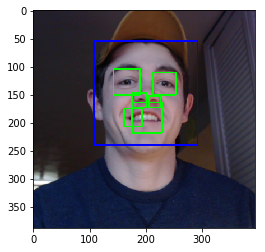

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('output.png'))
plt.show()

# Homework Challenge

Many companies today use Computer Vision in their core business
to detect emotions. For example, Apple recently bought Emotient, a
startup that builds Computer Vision tools to recognize people's
feelings (more info here ).

Building an AI that sees emotions can be highly valuable in some
markets. Imagine if you could detect people's emotions when they
are watching movies. That would have a powerful impact on the
cinema industry and bring significant added value to companies
like Netflix or Time Warner for which you could build powerful
recommender systems based on Computer Vision applications able
to understand emotions.

The Homework of this first module is to make a simple Computer
Vision application that can detect one emotion: happiness. Your
mission is therefore to build a Smile Detector.

* Importing the libraries

In [ ]:
import cv2

* Loading the cascades

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

* Defining a function that will do the detections

In [ ]:
def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 22)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)
    return frame

* Doing some Face Recognition with the webcam

In [ ]:
video_capture = cv2.VideoCapture(0)

In [ ]:
while True:
    _, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    cv2.imshow('Video', canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [ ]:
video_capture.release()
cv2.destroyAllWindows()

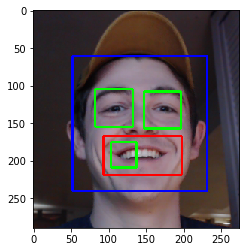

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('smile.png'))
plt.show()

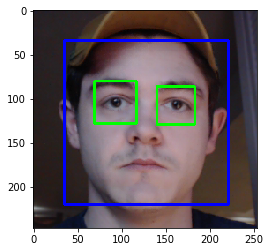

In [ ]:

plt.imshow(mpimg.imread('noSmile.png'))
plt.show()